In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
%matplotlib inline

In [2]:
dataset = pd.read_csv("Weather_Data_Bangladesh.csv")

In [3]:
dataset

,Unnamed: 0,Station Names,YEAR,Month,Max Temp,Min Temp,Rainfall,Relative Humidity,Wind Speed,Cloud Coverage,Bright Sunshine,Station Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Period
0,0,Barisal,1949,1,29.4,12.3,0.0,68.0,0.453704,0.6,7.831915,41950,536809.8,510151.9,22.70,90.36,4,1949.01
1,1,Barisal,1950,1,30.0,14.1,0.0,77.0,0.453704,0.8,7.831915,41950,536809.8,510151.9,22.70,90.36,4,1950.01
2,2,Barisal,1951,1,28.2,12.3,0.0,77.0,0.453704,0.6,7.831915,41950,536809.8,510151.9,22.70,90.36,4,1951.01
3,3,Barisal,1952,1,26.6,12.3,2.0,77.0,0.453704,1.0,7.831915,41950,536809.8,510151.9,22.70,90.36,4,1952.01
4,4,Barisal,1953,1,30.0,13.3,10.0,75.0,0.453704,1.6,7.831915,41950,536809.8,510151.9,22.70,90.36,4,1953.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21115,21115,Teknaf,2009,12,30.3,16.5,0.0,72.0,2.800000,0.9,8.700000,41998,734765.4,308914.1,20.87,92.26,4,2009.12
21116,21116,Teknaf,2010,12,31.7,16.7,193.0,79.0,2.400000,1.4,5.500000,41998,734765.4,308914.1,20.87,92.26,4,2010.12
21117,21117,Teknaf,2011,12,31.5,16.4,0.0,73.0,0.000000,1.5,7.400000,41998,734765.4,308914.1,20.87,92.26,4,2011.12
21118,21118,Teknaf,2012,12,30.0,15.8,0.0,70.0,1.800000,0.2,9.000000,41998,734765.4,308914.1,20.87,92.26,4,2012.12


In [4]:
dataset.head()

,Unnamed: 0,Station Names,YEAR,Month,Max Temp,Min Temp,Rainfall,Relative Humidity,Wind Speed,Cloud Coverage,Bright Sunshine,Station Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Period
0,0,Barisal,1949,1,29.4,12.3,0.0,68.0,0.453704,0.6,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1949.01
1,1,Barisal,1950,1,30.0,14.1,0.0,77.0,0.453704,0.8,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1950.01
2,2,Barisal,1951,1,28.2,12.3,0.0,77.0,0.453704,0.6,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1951.01
3,3,Barisal,1952,1,26.6,12.3,2.0,77.0,0.453704,1.0,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1952.01
4,4,Barisal,1953,1,30.0,13.3,10.0,75.0,0.453704,1.6,7.831915,41950,536809.8,510151.9,22.7,90.36,4,1953.01


In [5]:
dataset.shape

(21120, 18)

In [6]:
#Adding units in column names
column = ['Unnamed: 0', 'Station Names', 'YEAR', 'Month', 'Max Temp 0 C',
       'Min Temp 0 C', 'Rainfall (mm)', 'Relative Humidity %',
       'Wind Speed (m/s)', 'Cloud Coverage %', 'Bright Sunshine (Hours)',
       'Station Number', 'X_COR', 'Y_COR', 'LATITUDE', 'LONGITUDE', 'ALT',
       'Period']

In [7]:
dataset.columns = column
dataset

,Unnamed: 0,Station Names,YEAR,Month,Max Temp 0 C,Min Temp 0 C,Rainfall (mm),Relative Humidity %,Wind Speed (m/s),Cloud Coverage %,Bright Sunshine (Hours),Station Number,X_COR,Y_COR,LATITUDE,LONGITUDE,ALT,Period
0,0,Barisal,1949,1,29.4,12.3,0.0,68.0,0.453704,0.6,7.831915,41950,536809.8,510151.9,22.70,90.36,4,1949.01
1,1,Barisal,1950,1,30.0,14.1,0.0,77.0,0.453704,0.8,7.831915,41950,536809.8,510151.9,22.70,90.36,4,1950.01
2,2,Barisal,1951,1,28.2,12.3,0.0,77.0,0.453704,0.6,7.831915,41950,536809.8,510151.9,22.70,90.36,4,1951.01
3,3,Barisal,1952,1,26.6,12.3,2.0,77.0,0.453704,1.0,7.831915,41950,536809.8,510151.9,22.70,90.36,4,1952.01
4,4,Barisal,1953,1,30.0,13.3,10.0,75.0,0.453704,1.6,7.831915,41950,536809.8,510151.9,22.70,90.36,4,1953.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21115,21115,Teknaf,2009,12,30.3,16.5,0.0,72.0,2.800000,0.9,8.700000,41998,734765.4,308914.1,20.87,92.26,4,2009.12
21116,21116,Teknaf,2010,12,31.7,16.7,193.0,79.0,2.400000,1.4,5.500000,41998,734765.4,308914.1,20.87,92.26,4,2010.12
21117,21117,Teknaf,2011,12,31.5,16.4,0.0,73.0,0.000000,1.5,7.400000,41998,734765.4,308914.1,20.87,92.26,4,2011.12
21118,21118,Teknaf,2012,12,30.0,15.8,0.0,70.0,1.800000,0.2,9.000000,41998,734765.4,308914.1,20.87,92.26,4,2012.12


In [8]:
#Checking Correlation with Rainfall
#dataset.corr() ['Rainfall (mm)']
numeric_columns = dataset.select_dtypes(include=['float64', 'int64']).columns
correlation_result = dataset[numeric_columns].corr()['Rainfall (mm)']


In [9]:
#Drop Features that have very negligible Correlation with data
dataset = dataset.drop(['Station Names','Unnamed: 0','YEAR','Max Temp 0 C','X_COR','Y_COR','LATITUDE','LONGITUDE','ALT','Period'],axis =1)
dataset


,Month,Min Temp 0 C,Rainfall (mm),Relative Humidity %,Wind Speed (m/s),Cloud Coverage %,Bright Sunshine (Hours),Station Number
0,1,12.3,0.0,68.0,0.453704,0.6,7.831915,41950
1,1,14.1,0.0,77.0,0.453704,0.8,7.831915,41950
2,1,12.3,0.0,77.0,0.453704,0.6,7.831915,41950
3,1,12.3,2.0,77.0,0.453704,1.0,7.831915,41950
4,1,13.3,10.0,75.0,0.453704,1.6,7.831915,41950
...,...,...,...,...,...,...,...,...
21115,12,16.5,0.0,72.0,2.800000,0.9,8.700000,41998
21116,12,16.7,193.0,79.0,2.400000,1.4,5.500000,41998
21117,12,16.4,0.0,73.0,0.000000,1.5,7.400000,41998
21118,12,15.8,0.0,70.0,1.800000,0.2,9.000000,41998


In [10]:
#Null values Check
dataset.isnull().sum()

Month                      0
Min Temp 0 C               0
Rainfall (mm)              0
Relative Humidity %        0
Wind Speed (m/s)           0
Cloud Coverage %           0
Bright Sunshine (Hours)    0
Station Number             0
dtype: int64

In [11]:
dataset.columns

Index(['Month', 'Min Temp 0 C', 'Rainfall (mm)', 'Relative Humidity %',
       'Wind Speed (m/s)', 'Cloud Coverage %', 'Bright Sunshine (Hours)',
       'Station Number'],
      dtype='object')

In [12]:
#Removing Outliars
from scipy import stats
dataset = dataset[(np.abs(stats.zscore(dataset)) < 3).all(axis=1)]
dataset = dataset.reset_index(drop = True)
dataset

,Month,Min Temp 0 C,Rainfall (mm),Relative Humidity %,Wind Speed (m/s),Cloud Coverage %,Bright Sunshine (Hours),Station Number
0,1,12.3,0.0,68.0,0.453704,0.6,7.831915,41950
1,1,14.1,0.0,77.0,0.453704,0.8,7.831915,41950
2,1,12.3,0.0,77.0,0.453704,0.6,7.831915,41950
3,1,12.3,2.0,77.0,0.453704,1.0,7.831915,41950
4,1,13.3,10.0,75.0,0.453704,1.6,7.831915,41950
...,...,...,...,...,...,...,...,...
20222,12,16.5,0.0,72.0,2.800000,0.9,8.700000,41998
20223,12,16.7,193.0,79.0,2.400000,1.4,5.500000,41998
20224,12,16.4,0.0,73.0,0.000000,1.5,7.400000,41998
20225,12,15.8,0.0,70.0,1.800000,0.2,9.000000,41998


In [13]:
dataset.isnull().sum()

Month                      0
Min Temp 0 C               0
Rainfall (mm)              0
Relative Humidity %        0
Wind Speed (m/s)           0
Cloud Coverage %           0
Bright Sunshine (Hours)    0
Station Number             0
dtype: int64

# Visualization

C:\Users\User-PC\AppData\Local\Temp\ipykernel_11960\2373100041.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Rainfall (mm)'])


<Axes: xlabel='Rainfall (mm)', ylabel='Density'>

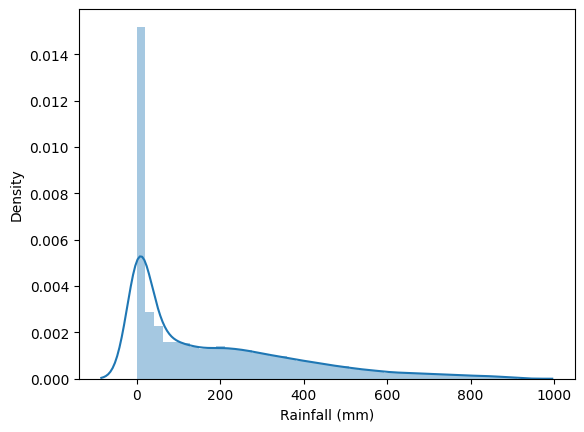

In [14]:
sns.distplot(dataset['Rainfall (mm)'])

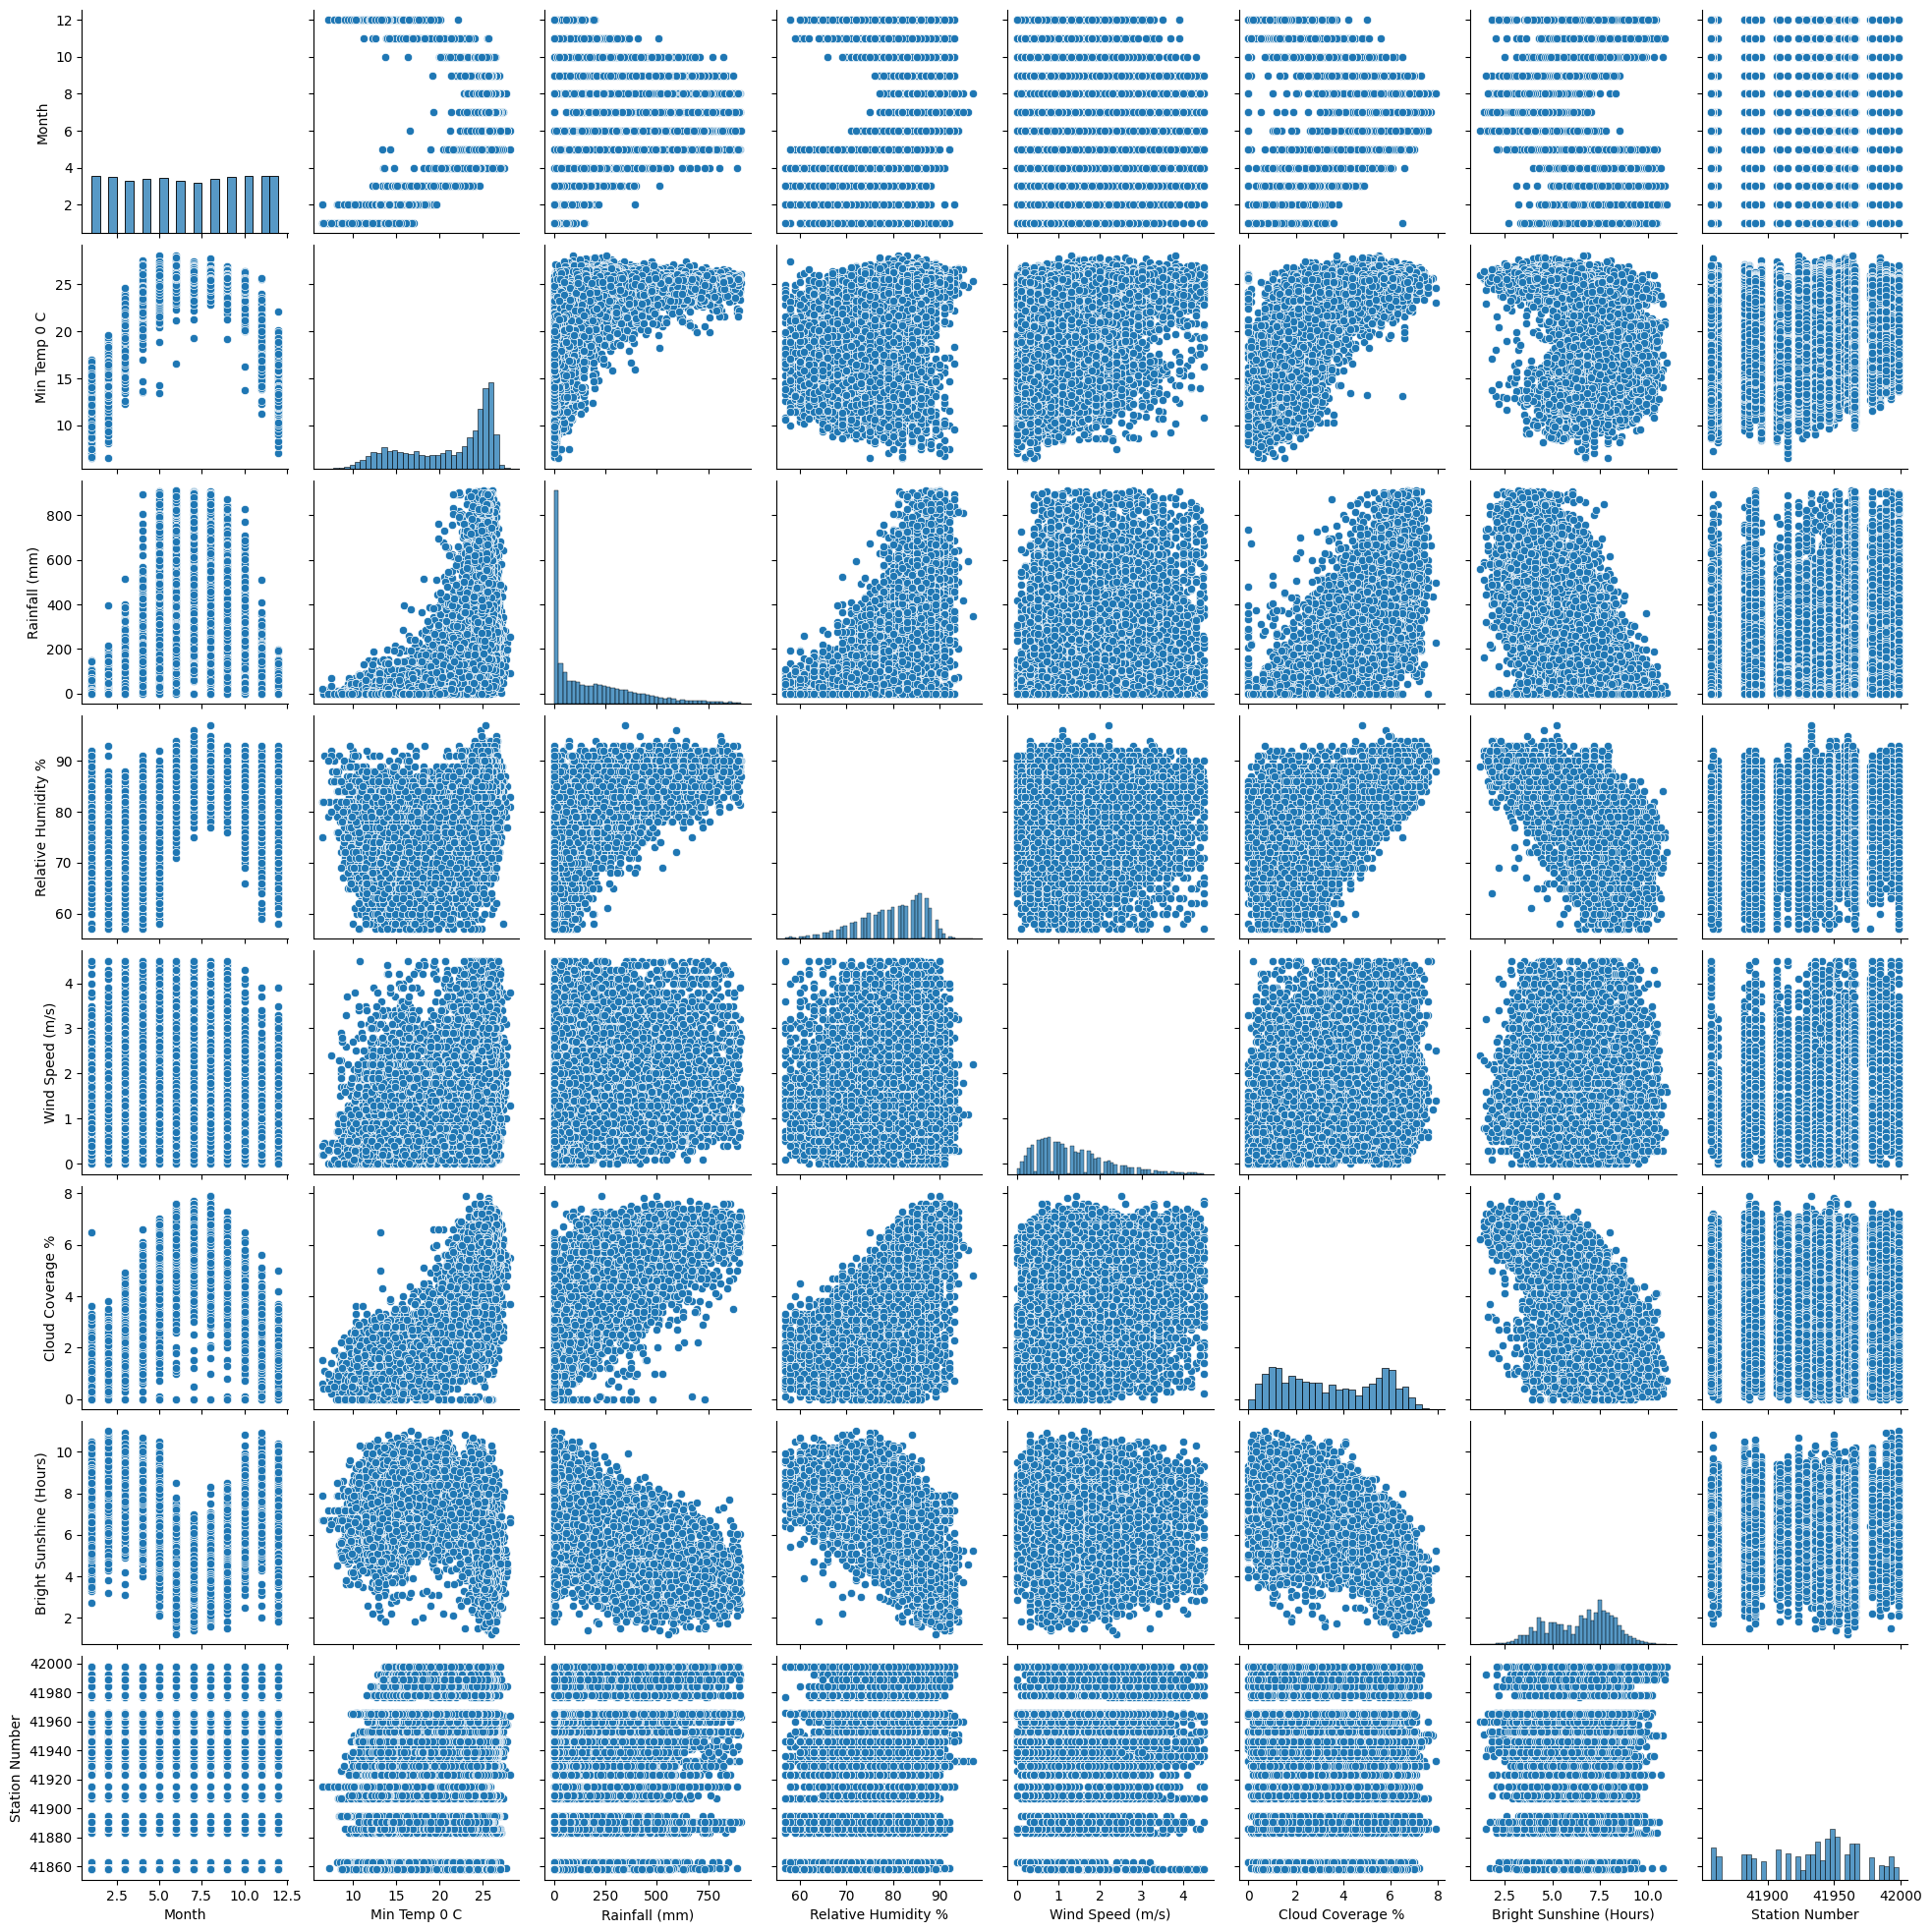

In [15]:
sns.pairplot(dataset)

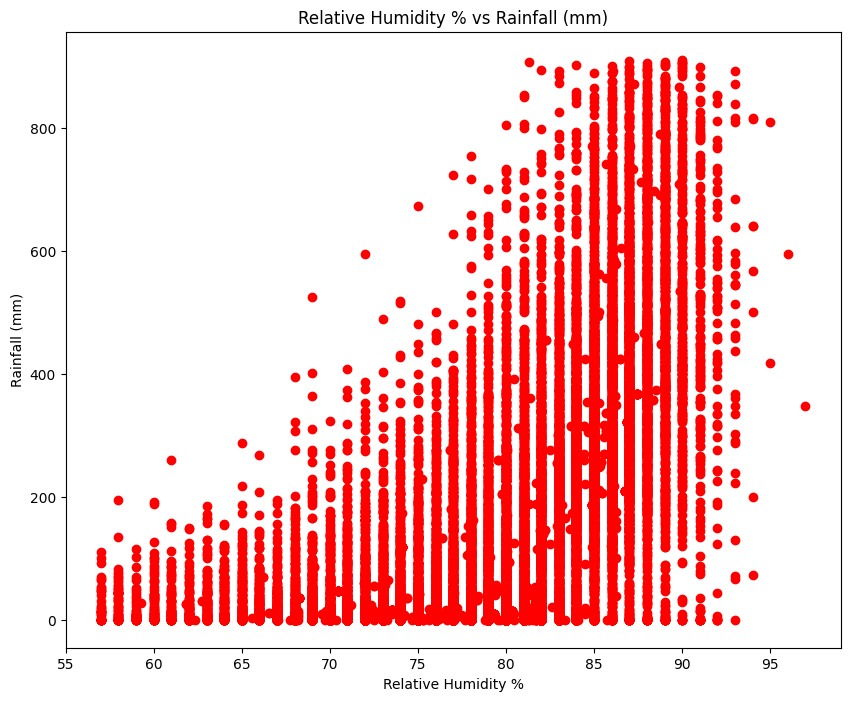

In [16]:
plt.figure(figsize=(10, 8))
x = dataset['Relative Humidity %']
y = dataset['Rainfall (mm)']
plt.scatter(x, y, color='red')
plt.title("Relative Humidity % vs Rainfall (mm)")
plt.xlabel("Relative Humidity %")
plt.ylabel("Rainfall (mm)")
plt.show()

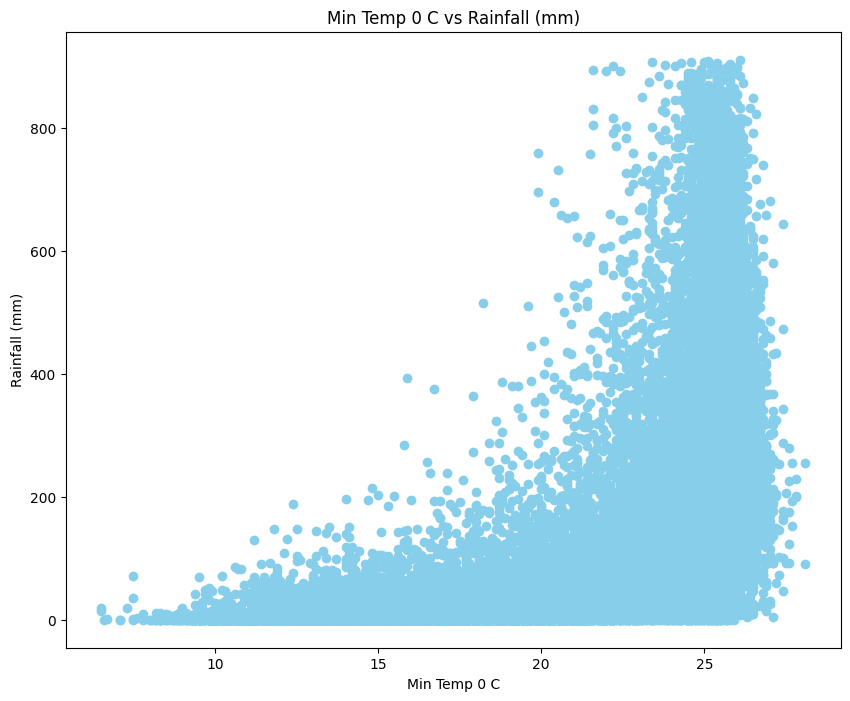

In [17]:
plt.figure(figsize=(10, 8))
x = dataset['Min Temp 0 C']
y = dataset['Rainfall (mm)']
plt.scatter(x, y, color='skyblue')
plt.title("Min Temp 0 C vs Rainfall (mm)")
plt.xlabel("Min Temp 0 C")
plt.ylabel("Rainfall (mm)")
plt.show()

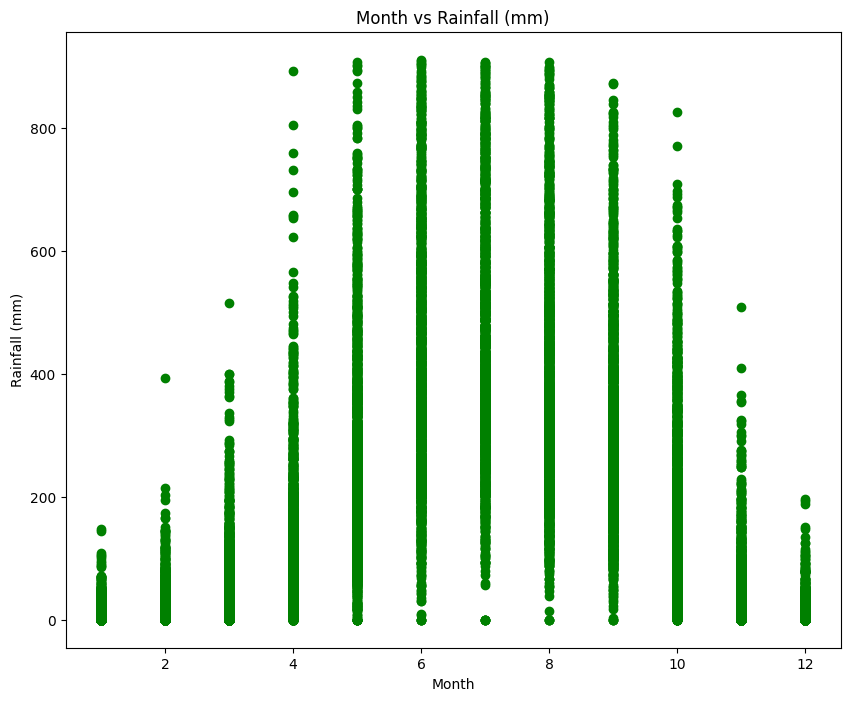

In [18]:
plt.figure(figsize=(10,8))
x = dataset['Month']
y = dataset['Rainfall (mm)']
plt.scatter(x, y, color='green')
plt.title("Month vs Rainfall (mm)")
plt.xlabel("Month")
plt.ylabel("Rainfall (mm)")
plt.show()

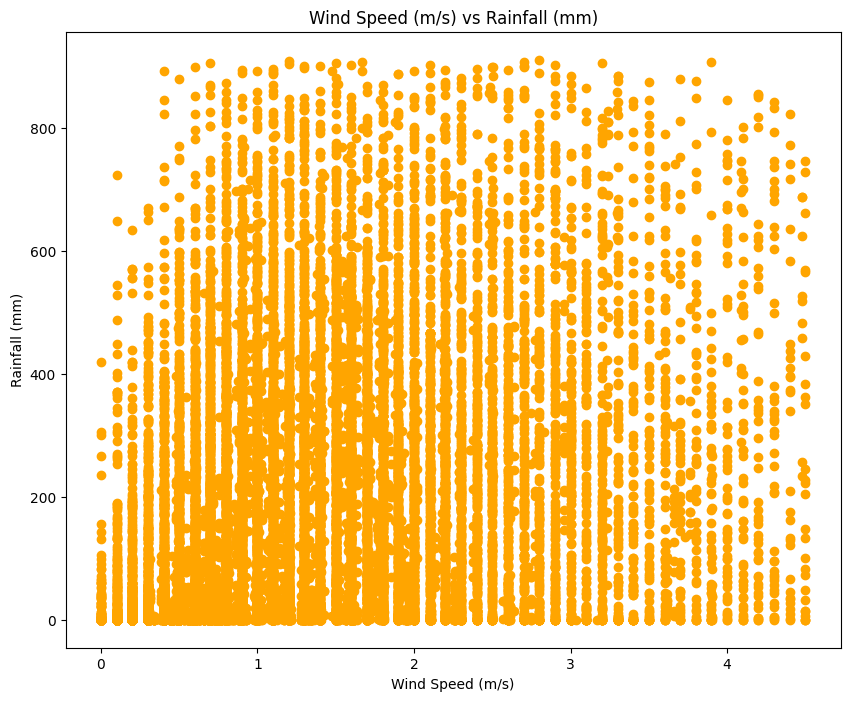

In [19]:
plt.figure(figsize=(10, 8))
x = dataset['Wind Speed (m/s)']
y = dataset['Rainfall (mm)']
plt.scatter(x, y, color='orange')
plt.title("Wind Speed (m/s) vs Rainfall (mm)")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Rainfall (mm)")
plt.show()

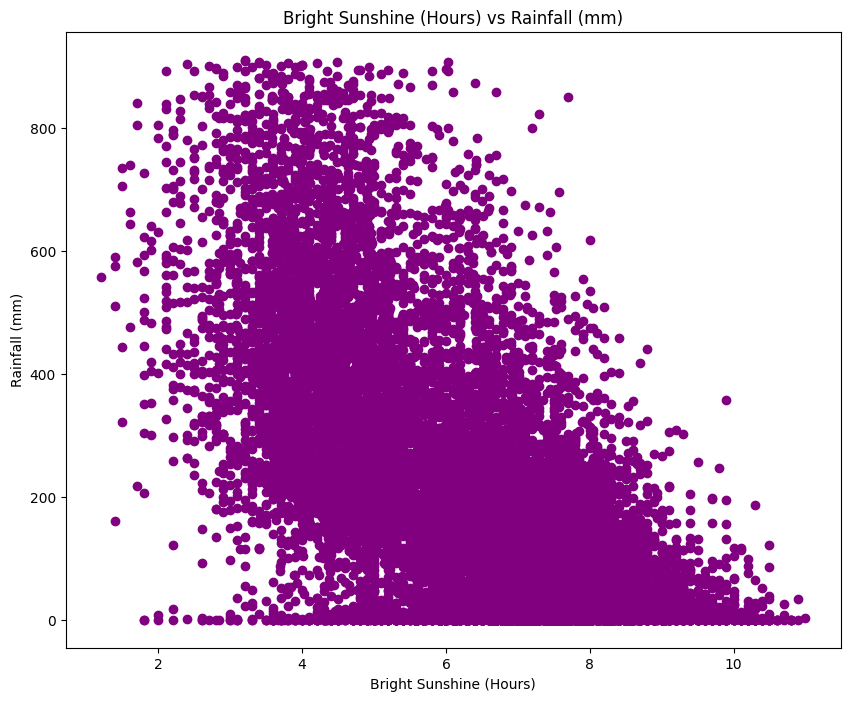

In [20]:
plt.figure(figsize=(10, 8))
x = dataset['Bright Sunshine (Hours)']
y = dataset['Rainfall (mm)']
plt.scatter(x, y, color='purple')
plt.title("Bright Sunshine (Hours) vs Rainfall (mm)")
plt.xlabel("Bright Sunshine (Hours)")
plt.ylabel("Rainfall (mm)")
plt.show()

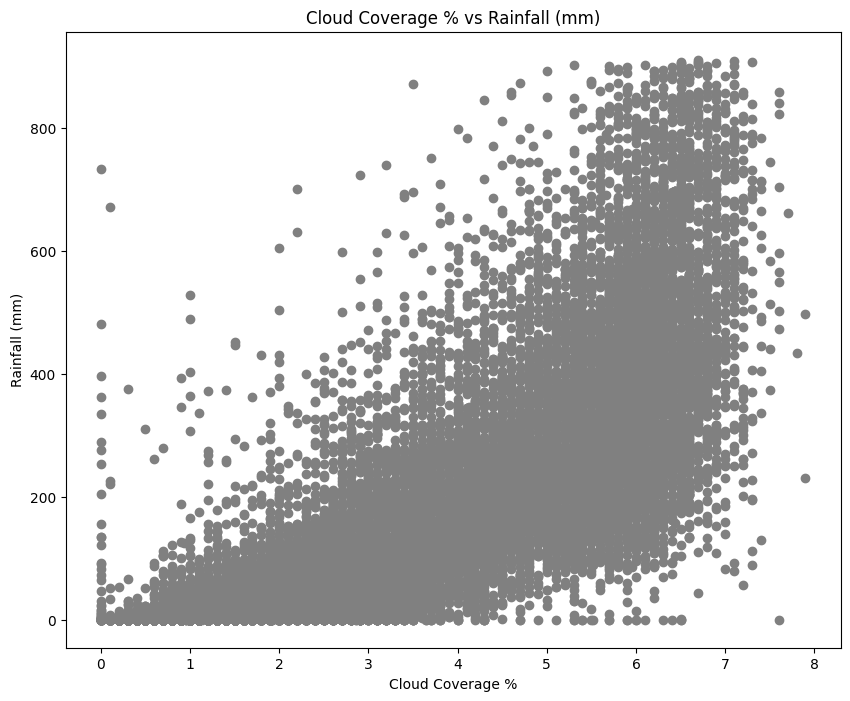

In [21]:
plt.figure(figsize=(10, 8))
x = dataset['Cloud Coverage %']
y = dataset['Rainfall (mm)']
plt.scatter(x, y, color='Grey')
plt.title("Cloud Coverage % vs Rainfall (mm)")
plt.xlabel("Cloud Coverage %")
plt.ylabel("Rainfall (mm)")
plt.show()

Data Normalization

In [22]:
# df = dataset[['Month', 'Min Temp 0 C', 'Relative Humidity %', 'Wind Speed (m/s)',
#               'Cloud Coverage %', 'Bright Sunshine (Hours)', 'Station Number']]
# df

In [23]:
# from sklearn import linear_model
# from sklearn.preprocessing import StandardScaler
# scale = StandardScaler()

In [24]:
# scale.fit(df)

In [25]:
# scaled_data = scale.transform(df)
# A = pd.DataFrame(scaled_data)
# A.columns =['Month', 'Min Temp 0 C', 'Relative Humidity %', 'Wind Speed (m/s)','Cloud Coverage %', 'Bright Sunshine (Hours)', 'Station Number']

# A['Rainfall (mm)'] = dataset['Rainfall (mm)']

# A

In [26]:
# data = dataset
# dataset = A
# dataset

Training Model

In [27]:
from sklearn import tree
import pydotplus
from sklearn.model_selection import train_test_split
import matplotlib.image as pltimg

In [28]:
dataset.describe()

,Month,Min Temp 0 C,Rainfall (mm),Relative Humidity %,Wind Speed (m/s),Cloud Coverage %,Bright Sunshine (Hours),Station Number
count,20227.000000,20227.000000,20227.000000,20227.000000,20227.000000,20227.000000,20227.000000,20227.000000
mean,6.540565,21.069848,181.408956,79.584952,1.338675,3.428879,6.454288,41933.453552
std,3.493743,5.000953,204.492814,7.101075,0.898370,2.053522,1.694135,36.643781
min,1.000000,6.500000,0.000000,57.000000,0.000000,0.000000,1.200000,41858.000000
25%,3.000000,16.793103,8.000000,75.000000,0.700000,1.500000,5.028571,41909.000000
50%,7.000000,23.200000,106.000000,81.000000,1.100000,3.200000,6.800000,41941.000000
75%,10.000000,25.400000,298.000000,85.000000,1.800000,5.400000,7.800000,41960.000000
max,12.000000,28.100000,911.000000,97.000000,4.500000,7.900000,11.000000,41998.000000


In [29]:
x = dataset.drop(['Rainfall (mm)'], axis=1)
x

,Month,Min Temp 0 C,Relative Humidity %,Wind Speed (m/s),Cloud Coverage %,Bright Sunshine (Hours),Station Number
0,1,12.3,68.0,0.453704,0.6,7.831915,41950
1,1,14.1,77.0,0.453704,0.8,7.831915,41950
2,1,12.3,77.0,0.453704,0.6,7.831915,41950
3,1,12.3,77.0,0.453704,1.0,7.831915,41950
4,1,13.3,75.0,0.453704,1.6,7.831915,41950
...,...,...,...,...,...,...,...
20222,12,16.5,72.0,2.800000,0.9,8.700000,41998
20223,12,16.7,79.0,2.400000,1.4,5.500000,41998
20224,12,16.4,73.0,0.000000,1.5,7.400000,41998
20225,12,15.8,70.0,1.800000,0.2,9.000000,41998


In [30]:
y = dataset['Rainfall (mm)']
y

0          0.0
1          0.0
2          0.0
3          2.0
4         10.0
         ...  
20222      0.0
20223    193.0
20224      0.0
20225      0.0
20226      0.0
Name: Rainfall (mm), Length: 20227, dtype: float64

In [31]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.3,random_state=1)

# Linear Regression Model

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
linearreg = LinearRegression()
linearreg.fit(xtrain, ytrain)

LinearRegression()

In [33]:
linearreg_predictions = linearreg.predict(xtest)
linearreg_predictions

array([257.12034267, 403.0898405 , 133.97336912, ...,  21.63337475,
       230.52896216, -15.36833581])

In [34]:
linearreg.score(xtest, ytest)

0.6694405757371525

# Decision Tree Model

In [35]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()

dtr.fit(xtrain, ytrain)

DecisionTreeRegressor()

In [36]:
dtr_predictions = dtr.predict(xtest)
dtr_predictions

array([196., 242.,  14., ...,  20.,  39.,   0.])

In [37]:
dtr.score(xtest, ytest)

0.5139757205208475

# Random Forest Model

In [38]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(xtrain,ytrain)

RandomForestRegressor()

In [39]:
rfr.predict(xtest)

array([201.09055556, 398.33429952,  62.27      , ...,   6.96      ,
       234.4       ,  12.84      ])

In [40]:
rfr.score(xtest,ytest)


0.7668286869896106

In [41]:
x.columns


Index(['Month', 'Min Temp 0 C', 'Relative Humidity %', 'Wind Speed (m/s)',
       'Cloud Coverage %', 'Bright Sunshine (Hours)', 'Station Number'],
      dtype='object')

# Prediction by User

In [45]:
def predict_rainfall(model, features):
    # Convert user input to a DataFrame with the appropriate column names
    user_input = pd.DataFrame([features], columns=x.columns)

    # Make predictions using the Random Forest model
    rainfall_prediction = model.predict(user_input)

    return rainfall_prediction

# Example usage
user_features = {
    'Month': 7,
    'Min Temp 0 C': 25,
    'Relative Humidity %': 80,
    'Wind Speed (m/s)': 3,
    'Cloud Coverage %': 50,
    'Bright Sunshine (Hours)': 7,
    'Station Number': 41883
}

predicted_rainfall = predict_rainfall(rfr, user_features)
print(f"Predicted Rainfall: {predicted_rainfall[0]} mm")


Predicted Rainfall: 439.48555555555555 mm


# Station Numbers and Counting Stations

In [54]:
# import pandas as pd

# # Assuming 'dataset' is your DataFrame
# unique_station_numbers = x['Station Number'].unique()

# print("All Station Numbers:")
# print(x['Station Number'])

# print("\nUnique Station Numbers:")
# soru= sorted(unique_station_numbers)
# options = ""
# count = 0
# for value in soru:
#     options += f'<option value="{value}">{value}</option>\n'
#     count=count+1
# print(options)

# print(count)

In [51]:
# Define the range of values for the options
start_value = 41800
end_value = 41810

# Generate the options in a loop
options = ""
for value in range(start_value, end_value + 1):
    options += f'<option value="{value}">{value}</option>\n'

# Print or use the options as needed
print(options)


<option value="41800">41800</option>
<option value="41801">41801</option>
<option value="41802">41802</option>
<option value="41803">41803</option>
<option value="41804">41804</option>
<option value="41805">41805</option>
<option value="41806">41806</option>
<option value="41807">41807</option>
<option value="41808">41808</option>
<option value="41809">41809</option>
<option value="41810">41810</option>



In [44]:
import joblib
from sklearn.ensemble import RandomForestRegressor

# Assuming you have already trained your RandomForestRegressor model (rfr)
# If not, train it before saving

# Save the model to a file
joblib.dump(rfr, 'predict_rainfall_model.joblib')


['predict_rainfall_model.joblib']